In [7]:

#autoencoder
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

In [8]:
#loading and preprocessing the dataset
(x_train,_),(x_test,_)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 15s 1us/step


In [9]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print(x_train.shape)

(60000, 28, 28)


In [10]:
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)

(60000, 784)


In [11]:
input_img=Input(shape=(784,))
encoded=Dense(128,activation='sigmoid')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)

autoencoder=Model(input_img,decoded)

autoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')

autoencoder.fit(x_train,x_train,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.3484 - val_loss: 0.2322
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.2209 - val_loss: 0.1918
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1858 - val_loss: 0.1663
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1625 - val_loss: 0.1481
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1459 - val_loss: 0.1353


In [13]:
import matplotlib.pyplot as plt 

encoded_img=autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


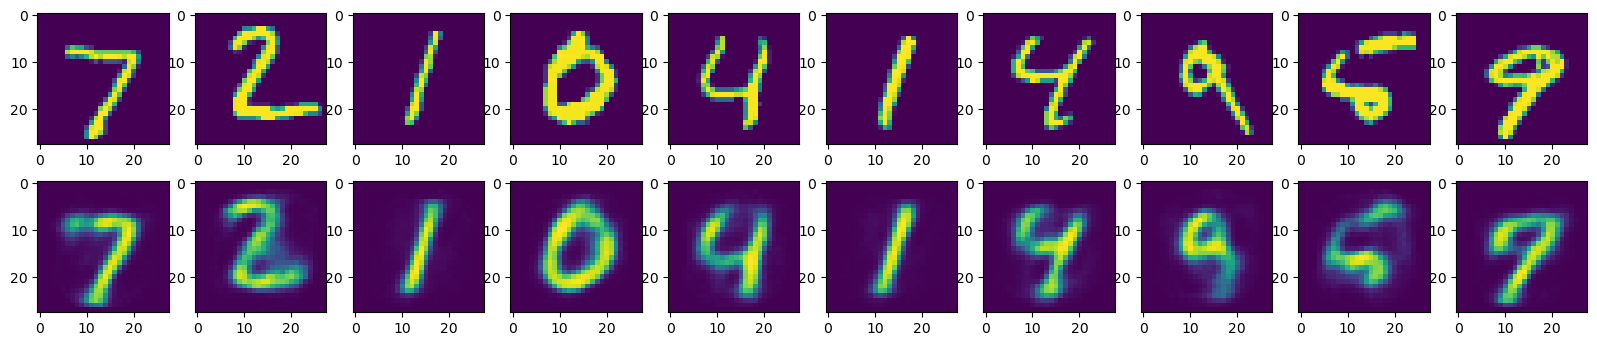

In [28]:
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_img[i].reshape(28,28))
    

(60000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3461 - val_loss: 0.2223
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2059 - val_loss: 0.1597
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1493 - val_loss: 0.1165
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1068 - val_loss: 0.0790
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0693 - val_loss: 0.0443
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


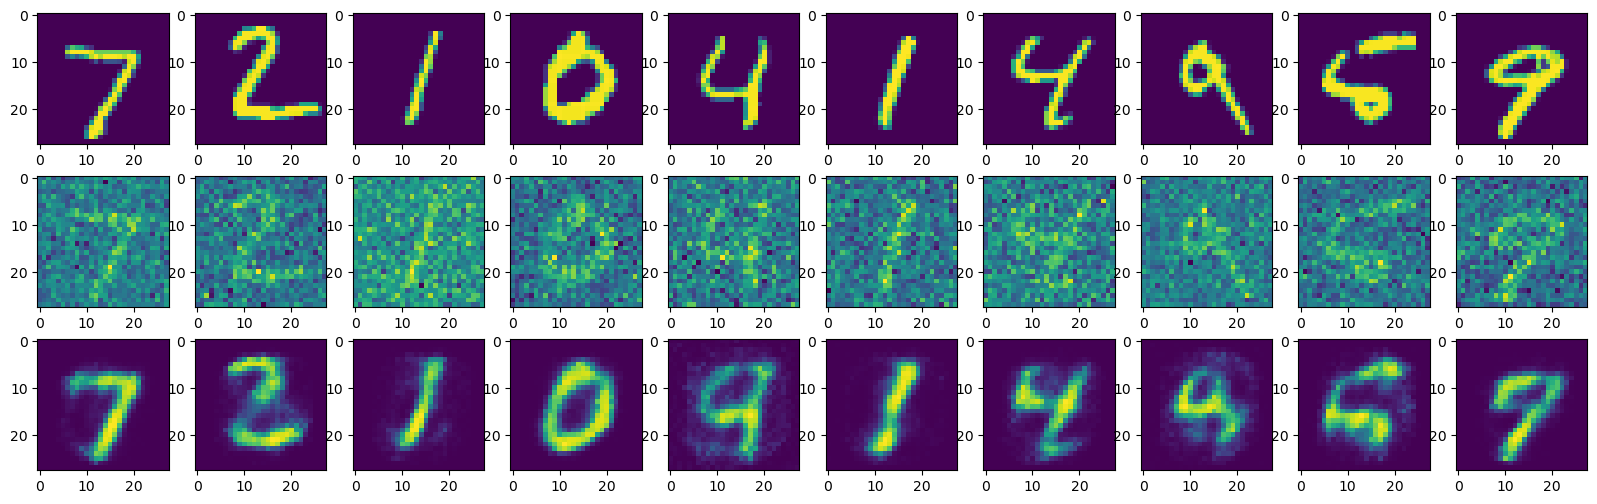

In [47]:
#noisy autoencoder 
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist


(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print(x_train.shape)

noise_factor=0.5
x_train_noisy=x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

x_train_noisy=x_train_noisy.reshape((len(x_train_noisy),np.prod(x_train.shape[1:])))
x_test_noisy=x_test_noisy.reshape((len(x_test_noisy),np.prod(x_test.shape[1:])))
print(x_train_noisy.shape)
print(x_test_noisy.shape)

input_img=Input(shape=(784,))
encoded=Dense(128,activation='sigmoid')(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)


noisy_autoencoder=Model(input_img,decoded)

noisy_autoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')
noisy_autoencoder.fit(x_train_noisy,x_train_noisy,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test_noisy,x_test_noisy))

encoded_imgs=noisy_autoencoder.predict(x_test_noisy)


import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,6))
for i in range(n):
    ax=plt.subplot(3,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax=plt.subplot(3,n,i+1+n)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    ax=plt.subplot(3,n,i+1+2*n)
    plt.imshow(encoded_imgs[i].reshape(28,28))

(60000, 28, 28)
(60000, 784)
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.0260 - val_loss: 0.6215
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6017 - val_loss: 0.5509
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.5365 - val_loss: 0.4951
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4533 - val_loss: 0.3906
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.3804 - val_loss: 0.3560
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


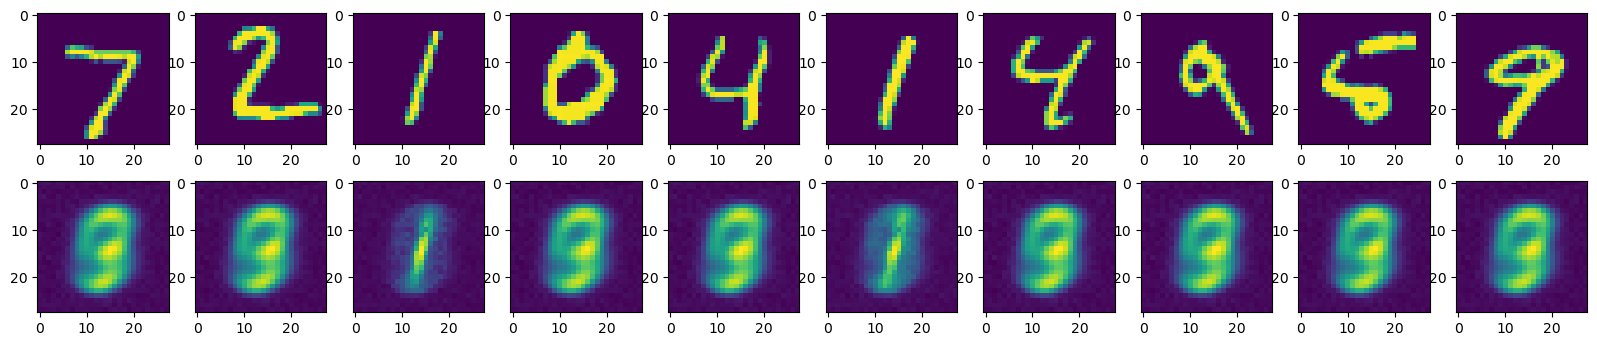

In [59]:
#sparse autoencoder
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
print(x_train.shape)

x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
print(x_train.shape)

input_img=Input(shape=(784,))
encoded=Dense(128,activation='sigmoid',activity_regularizer=l1(10e-5))(input_img)
decoded=Dense(784,activation='sigmoid')(encoded)

sparseautoencoder=Model(input_img,decoded)

sparseautoencoder.compile(optimizer=Adam(),loss='binary_crossentropy')

sparseautoencoder.fit(x_train,x_train,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test,x_test))

encoded_imgs=sparseautoencoder.predict(x_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
n=10
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))